In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [17]:
file_path = '/content/SONY.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [18]:
df

,Close,Open,High,Low
Date,,,,
2019-03-01,47.89,47.82,48.06,47.69
2019-03-04,47.62,47.78,47.87,47.23
2019-03-05,47.66,47.75,47.90,47.53
2019-03-06,47.53,47.68,47.81,47.52
2019-03-07,46.40,47.00,47.00,46.14
...,...,...,...,...
2024-05-20,83.59,83.75,84.00,83.50
2024-05-21,82.00,82.81,82.81,81.97
2024-05-22,81.26,81.73,81.81,81.18


In [19]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [20]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -2.1977952219382466
p-value: 0.20704663709274118
Critical Values:
   1%: -3.4353516488758684
   5%: -2.8637488209107196
   10%: -2.5679459879960373
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -2.206564136749211
p-value: 0.2038716859863181
Critical Values:
   1%: -3.4353440094155756
   5%: -2.8637454499962196
   10%: -2.5679441928400135
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -2.1961831150475484
p-value: 0.20763368145536742
Critical Values:
   1%: -3.4353440094155756
   5%: -2.8637454499962196
   10%: -2.5679441928400135
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -2.0946238929878205
p-value: 0.24668184909442797
Critical Values:
   1%: -3.435325012475485
   5%: -2.8637370675527087
   10%: -2.567939728836562
==> Không phải chuỗi dừng



In [21]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 7:3
train, test = train_test_split(df, test_size=0.3, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [22]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -9.906142701593545
p-value: 3.259677396190461e-17
Critical Values:
   1%: -3.4375326734225844
   5%: -2.8647108493902986
   10%: -2.568458364370556
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -8.035407432407457
p-value: 1.908655284123826e-12
Critical Values:
   1%: -3.4375803238413085
   5%: -2.8647318597670877
   10%: -2.568469555703587
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -10.937107616370431
p-value: 9.498555366873686e-20
Critical Values:
   1%: -3.4375090829661534
   5%: -2.864700447588469
   10%: -2.5684528237924527
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -27.103096547992806
p-value: 0.0
Critical Values:
   1%: -3.437470108019385
   5%: -2.8646832620852853
   10%: -2.5684436698650503
==> Là chuỗi dừng



In [23]:
!pip install pmdarima

In [24]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Searching order of p and q for : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{column} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3482.890, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3481.165, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3482.212, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3482.306, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3483.005, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.342 seconds
optimal order for:Close is: (0, 0, 0) 


Searching order of p and q for : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3447.063, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3444.505, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3446.499, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3446.500, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3446.345, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit ti

In [25]:

model = VARMAX(train_diff, order=(1, 0))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                  922
Model:                                       VAR(1)   Log Likelihood               -4119.187
                                        + intercept   AIC                           8298.374
Date:                              Sun, 02 Jun 2024   BIC                           8443.171
Time:                                      14:09:15   HQIC                          8353.623
Sample:                                           0                                         
                                              - 922                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     0.00, 55.50, 19.03, 22.44   Jarque-Bera (JB):   1102.61, 1074.88, 944.71, 473.82
Prob(Q):                   0.97, 0.00, 0.00, 0.00   Prob(J

In [26]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2022-10-27,0.032210,0.062664,0.152185,0.102960
2022-10-28,0.015238,0.014493,-0.037293,-0.009684
2022-10-31,0.024071,0.018923,0.049444,0.032235
2022-11-01,0.019212,0.022265,0.007666,0.015608
2022-11-02,0.021934,0.019048,0.028457,0.022601
...,...,...,...,...
2024-05-20,0.020956,0.020342,0.021479,0.020478
2024-05-21,0.020956,0.020342,0.021479,0.020478
2024-05-22,0.020956,0.020342,0.021479,0.020478


In [28]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[len(train)-1]

# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_original_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_original_data.loc[index] = current_values

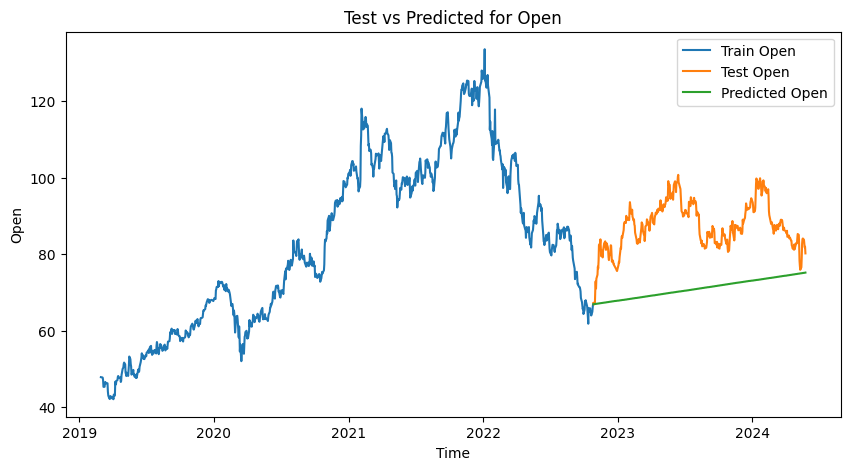

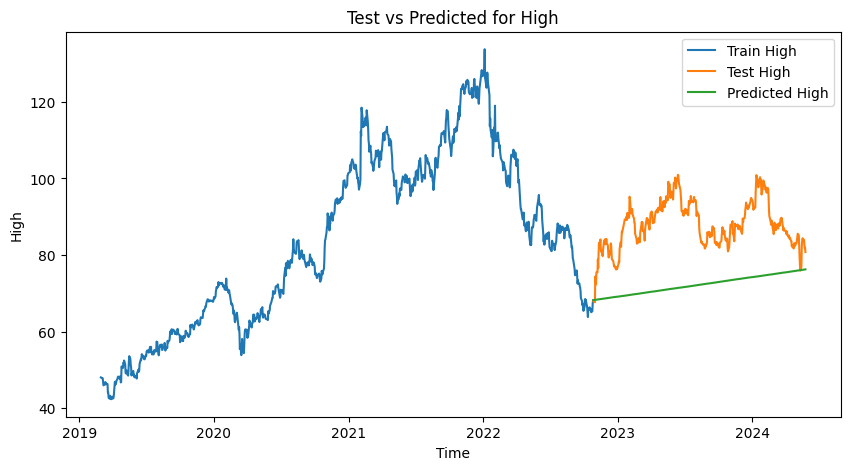

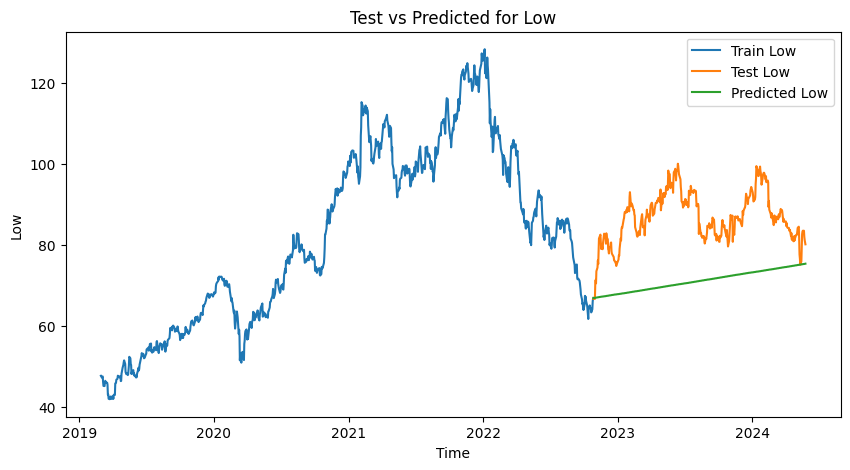

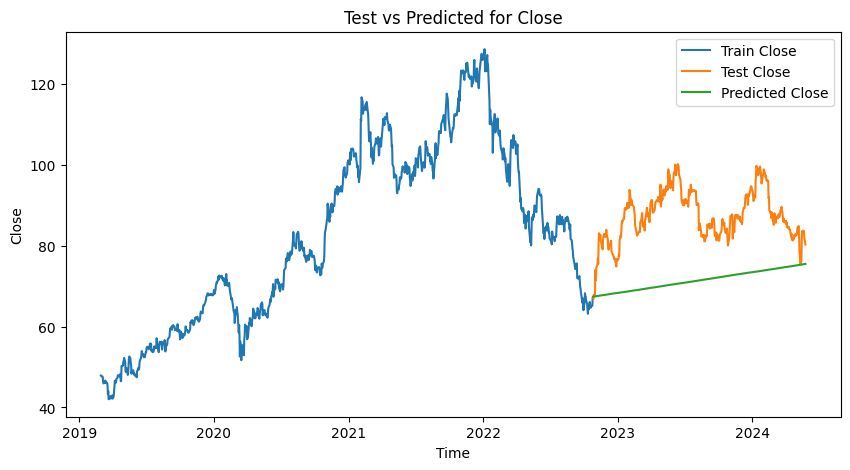

In [29]:
# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Open', 'High', 'Low', 'Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_original_data.index, forecast_original_data[col], label=f'Predicted {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [30]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)
r2 = r2_score(test, predicts_date)

print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

results_GBM = pd.DataFrame([['Gradient Boosting', mape, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_GBM

MAPE: 0.9998
RMSE: 87.5135
MSE: 7658.6089
R²: -206.0113


,Model,MAE,MSE,RMSE,R2 Score
0,Gradient Boosting,0.999759,7658.608884,87.513478,-206.011328
